In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/Colab\ Notebooks

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
!pip install statsmodels==0.13.0
!pip install pmdarima

     |████████████████████████████████| 9.8 MB 5.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 1.4 MB 6.8 MB/s 


In [ ]:
import numpy as np
import pandas as pd

from matplotlib import rcParams
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import missingno

import scipy as sp

# TIME SERIES
from statsmodels.tsa.arima.model import ARIMA # v 0.13.0
#from statsmodels.tsa.arima_model import ARIMA #v 0.12.1
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf,arma_order_select_ic
import statsmodels.stats.diagnostic as smd
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import tensorflow_probability as tfp
tfd = tfp.distributions
tfs = tfp.stats

import pmdarima as pm
from pmdarima.arima.utils import ndiffs

In [ ]:
import glob

#get all csv file names
filepath='Datafor555/CA'
all_files = glob.glob(filepath + "/*.csv")

#put all csv file names into a list
ca = []
for filename in all_files:
    yr=filename[-6:-4]
    df_ca = pd.read_csv(filename)
    df_ca['year']=yr
    ca.append(df_ca)

#concatenate all csv files into a dataframe
df_CA = pd.concat(ca, axis=0)

# df.loc[:,['AverageTemp','YearlyPrecipiation','Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048']]
df_CA_grouped_yearly=df_CA.groupby(['year']).mean()

df_CA_grouped_yearly

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,11,36,37,38,39,44,61,63,66,67,68,69,70,75,76,77,79,80,86,87,88,98,106,107,108,109,113,114,121,130,131,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,11,36,37,38,39,41,44,61,63,66,67,68,69,70,75,76,77,79,80,86,87,88,98,102,106,107,108,109,113,114,119,120,121,123,124,128,129,130,131,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,17,36,37,38,39,41,44,61,63,66,67,68,69,70,75,76,77,79,80,86,87,88,102,106,107,108,109,113,114,119,120,121,123,124,128,129,130,131,133) have mixed types.Specify dtype opti

,STATE_CODE_001,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,HISTORY_037,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,...,RIGHT_CURB_MT_050B,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_054B,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,OPERATING_RATING_064,INVENTORY_RATING_066,POSTING_EVAL_070,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_PCNT_098B,STRAHNET_HIGHWAY_100,TRAFFIC_DIRECTION_102,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,SUFFICIENCY_RATING,SUBMITTED_BY,LOWEST_RATING,DECK_AREA,CAT23,CAT29
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00,6,3.476536,0.795372,0.003407,6.137208,57.306683,24524.942911,73.465347,10.648233,0.390703,0.993076,3.570721e+07,1.186594e+08,22.260707,2.992384,3.323343,3.445697,10.876283,1964.398986,3.011821,2.839732,30822.938884,1997.577287,14.322377,0.369799,20.658708,0.074189,4.942171,0.065293,0.305329,2.082461,3.209158,2.971982,5.223662,0.106971,0.178644,3.151955,0.398817,16.357834,23.938409,...,0.454968,14.602254,15.480450,97.319209,2.067993,57.506214,55.830480,59.824371,34.511701,4.919786,35.757650,1.018275,77.066936,728.642812,23.996284,475.567045,526.376019,603.167992,1225.722375,123.320196,1843.539868,1998.920843,2.639847,0.274691,1.727463,0.338673,0.046759,318.930491,7.888393,0.262430,2.211948,38302.425451,2012.958793,0.621481,82.934134,NaN,NaN,NaN,NaN,NaN
01,6,3.498745,0.851993,0.003357,6.135517,57.423601,25017.462969,72.347896,10.565283,0.386709,0.993184,3.542957e+07,1.178210e+08,21.514169,2.992733,3.507283,3.727174,10.965074,1964.996292,3.043250,2.803041,30592.891551,1997.531938,14.383471,0.383192,20.460734,0.074708,4.923584,0.064576,0.299349,2.052923,3.174258,2.991525,5.219316,0.108600,0.187974,3.144639,0.389865,16.028525,24.061039,...,0.456828,14.638244,15.754644,96.216699,2.084115,53.332024,1.818159,59.831761,34.521186,4.924292,35.765098,1.009892,80.320145,722.912723,23.999827,329.084890,294.746956,402.297684,1453.034984,146.219384,1936.104328,1998.930822,20.409091,0.277380,1.741487,0.337457,0.046679,344.060985,7.877002,0.263132,2.270644,37933.656452,2013.041338,0.026793,83.104989,NaN,NaN,NaN,NaN,NaN
02,6,3.494327,0.929232,0.003377,6.122232,57.425464,25748.152700,71.059184,10.482199,0.379069,0.710017,3.540855e+07,1.178283e+08,21.249079,2.992325,3.596004,3.830913,11.068537,1965.382725,3.063894,2.537650,30386.579031,1997.563304,14.313133,0.411975,20.369168,0.075585,4.927331,0.067628,0.303406,2.035487,3.138697,3.007796,5.203647,0.110264,0.197012,3.142851,0.391631,15.615631,24.271528,...,0.456911,14.626577,15.943205,96.271587,2.011722,48.197094,2.119776,59.780811,34.547859,4.929726,35.779233,1.011012,80.286753,672.309660,24.000293,567.953967,690.422642,661.333333,1305.201285,130.432432,1959.470196,1998.955064,20.409091,0.279993,1.756337,0.340265,0.043415,355.950588,7.848635,0.271277,2.075246,37824.297769,2013.211686,0.112261,83.169150,NaN,NaN,NaN,NaN,NaN
03,6,3.504891,0.976085,0.002570,6.126769,57.404404,26141.298070,70.319113,10.439564,0.377537,1.000452,3.546909e+07,1.180519e+08,21.103738,2.992220,3.520648,3.749117,11.116303,1965.890027,3.091502,2.558029,31292.4

In [ ]:
import requests
import json
from datetime import datetime
Token = 'VWZBuBMjMoMTekrIzutLPmsXsvWwIWPA'
station_id = '	GHCND:USR0000CAPT'

In [ ]:
#initialize lists to store data
dates_temp = []
temps = []
results = {}

#for each year from 2015-2019 ...
for year in range(1992, 2021):
    year = str(year)
    print('working on year '+year)
    
    #make the api call for temperature
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&stationid=	GHCND:USR0000CAPT&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':Token})
    #load the api response as a json
    d = json.loads(r.text)
    #get all items in the response which are average temperature readings
    avg_temps = [item for item in d['results'] if item['datatype']=='TAVG']
    #get the date field from all average temperature readings
    dates_temp += [item['date'] for item in avg_temps]
    #get the actual average temperature from all average temperature readings
    temps += [item['value'] for item in avg_temps]

working on year 1992
working on year 1993
working on year 1994
working on year 1995
working on year 1996
working on year 1997
working on year 1998
working on year 1999
working on year 2000
working on year 2001
working on year 2002
working on year 2003
working on year 2004
working on year 2005
working on year 2006
working on year 2007
working on year 2008
working on year 2009
working on year 2010
working on year 2011
working on year 2012
working on year 2013
working on year 2014
working on year 2015
working on year 2016
working on year 2017
working on year 2018
working on year 2019
working on year 2020


In [ ]:
#initialize dataframe
df_temp = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_temp['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_temp]
df_temp['avgTemp'] = [float(v)/10.0*1.8 + 32 for v in temps]

df_temp['year']=df_temp['date'].dt.year
avg_temp=df_temp.groupby(['year']).mean()
min_temp=df_temp.groupby(['year']).min()
max_temp=df_temp.groupby(['year']).max()
max_temp

,date,avgTemp
year,,
1992,1992-12-28,81.32
1993,1993-12-31,83.84
1994,1994-12-31,96.80
1995,1995-12-31,80.78
1996,1996-12-31,83.30
1997,1997-12-31,95.54
1998,1998-12-10,82.58
1999,1999-12-31,131.00
2000,2000-12-31,79.70


In [ ]:
dates_prcp = []
prcp = []

#for each year from 2015-2019 ...
for year in range(1992, 2021):
    year = str(year)
    print('working on year '+year)
    
    #make the api call for temperature
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=PRCP&limit=1000&stationid=GHCND:USS0049M08S&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':Token})
    #load the api response as a json
    d = json.loads(r.text)
    #get all items in the response which are average temperature readings
    avg_prcp = [item for item in d['results'] if item['datatype']=='PRCP']
    #get the date field from all average temperature readings
    dates_prcp += [item['date'] for item in avg_prcp]
    #get the actual average temperature from all average temperature readings
    prcp += [item['value'] for item in avg_prcp]

working on year 1992
working on year 1993
working on year 1994
working on year 1995
working on year 1996
working on year 1997
working on year 1998
working on year 1999
working on year 2000
working on year 2001
working on year 2002
working on year 2003
working on year 2004
working on year 2005
working on year 2006
working on year 2007
working on year 2008
working on year 2009
working on year 2010
working on year 2011
working on year 2012
working on year 2013
working on year 2014
working on year 2015
working on year 2016
working on year 2017
working on year 2018
working on year 2019
working on year 2020


In [ ]:
#initialize dataframe
df_prcp = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_prcp['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in dates_prcp]
df_prcp['avgprcp'] = [float(v)/10.0*1.8 + 32 for v in prcp]

df_prcp['year']=df_prcp['date'].dt.year
avg_prcp=df_prcp.groupby(['year']).mean()
avg_prcp

,avgprcp
year,
1992,37.851967
1993,38.952438
1994,37.603178
1995,36.860000
1996,36.796557
1997,37.201753
1998,37.149973
1999,37.989315
2000,38.381148


In [ ]:
d={'92':1992, '93':1993, '94':1994,'95':1995,'96':1996,'97':1997,'98':1998,'99':1999,'00':2000,'01':2001,'02':2002,'03':2003,'04':2004,'05':2005,'06':2006,'07':2007,'08':2008,'09':2009,'10':2010,'11':2011,'12':2012,'13':2013,'14':2014,'15':2015,'16':2016,'17':2017,'18':2018,'19':2019,'20':2020}
df_CA['year']=df_CA['year'].map(d)
df_CA

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29
0,6,01 0002,1,2.0,1.0,101,0.0,1.0,15.0,0.0,MINOT CREEK,NaN,NaN,NaN,99.99,NaN,NaN,NaN,NaN,41331800.0,124031200.0,199.0,3.0,1.0,1.0,2.0,1957.0,2.0,0.0,4900.0,1990.0,5,12.5,2.0,20.0,0.0,0,0,0,0,...,NaN,NaN,NaN,0.0,2,6,0,0,14.0,0.0,NaN,Y,6,NaN,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,77.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,01 0003,1,2.0,1.0,101,0.0,1.0,15.0,0.0,HUNTER CREEK,NaN,NaN,NaN,99.99,NaN,NaN,NaN,NaN,41333000.0,124033000.0,199.0,3.0,1.0,1.0,2.0,1951.0,2.0,0.0,4900.0,1990.0,5,8.5,0.0,45.0,0.0,1,1,1,1,...,NaN,NaN,NaN,0.0,1,6,0,0,14.0,0.0,NaN,Y,6,NaN,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,63.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,01 0004,1,2.0,1.0,101,0.0,1.0,15.0,0.0,HIGH PRAIRIE C,NaN,NaN,NaN,99.99,NaN,NaN,NaN,NaN,41340600.0,124040600.0,199.0,3.0,1.0,1.0,2.0,1957.0,2.0,0.0,4900.0,1990.0,5,12.2,0.0,0.0,0.0,0,1,1,1,...,NaN,NaN,NaN,0.0,2,6,0,0,14.0,0.0,NaN,Y,6,NaN,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,79.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,01 0005,1,2.0,1.0,101,0.0,1.0,15.0,0.0,WILSON CREEK,NaN,NaN,NaN,99.99,NaN,NaN,NaN,NaN,41361800.0,124060000.0,199.0,3.0,1.0,1.0,2.0,1957.0,4.0,0.0,4700.0,1990.0,5,18.3,2.0,28.0,0.0,0,1,1,1,...,NaN,NaN,NaN,0.0,1,1,0,0,14.0,0.0,NaN,Y,6,NaN,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,78.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,01 0006,1,2.0,1.0,199,0.0,1.0,15.0,0.0,SMITH RIVER (HIOUCHI),NaN,NaN,NaN,99.99,NaN,NaN,NaN,NaN,41482400.0,124044800.0,11.0,3.0,1.0,1.0,2.0,1990.0,2.0,0.0,3300.0,1989.0,6,12.2,0.0,36.0,1.0,1,1,1,1,...,NaN,NaN,NaN,0.0,1,1,0,0,10.0,0.0,NaN,Y,7,NaN,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,90.1,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29806,6,58 0325,2,1.0,1.0,8,0.0,NaN,25.0,0.0,SAND HILLS OVERCROSSING,NaN,NaN,NaN,5.25,NaN,NaN,NaN,NaN,32423000.0,115023000.0,10.0,3.0,NaN,NaN,1.0,1989.0,2.0,5.0,8700.0,1991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29807,6,58C0008,2,4.0,0.0,0W989,0.0,NaN,25.0,0.0,WINTERHAVEN UP(PICACHO R,NaN,SPTCO,100 E QUECHAN RD ',4.29,NaN,NaN,NaN,NaN,32441200.0,114371200.0,3.0,3.0,NaN,NaN,17.0,1955.0,0.0,2.0,4000.0,1990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,

In [ ]:
min_temp['min_temp']=min_temp['avgTemp']
max_temp['max_temp']=max_temp['avgTemp']

min_temp.drop(columns=['avgTemp'], inplace=True)
max_temp.drop(columns=['avgTemp'], inplace=True)

In [ ]:
df1_CA=df_CA.merge(avg_temp, left_on='year', right_index=True)
df2_CA=df1_CA.merge(avg_prcp, left_on='year', right_index=True)
df3_CA=df2_CA.merge(min_temp, left_on='year', right_index=True)
df4_CA=df3_CA.merge(max_temp, left_on='year', right_index=True)
df4_CA

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29,avgTemp,avgprcp,date_x,min_temp,date_y,max_temp
0,6,01 0002,1,2.0,1.0,101,0.0,1.0,15.0,0.0,MINOT CREEK,NaN,NaN,NaN,99.99,NaN,NaN,NaN,NaN,41331800.0,124031200.0,199.0,3.0,1.0,1.0,2.0,1957.0,2.0,0.0,4900.0,1990.0,5,12.5,2.0,20.0,0.0,0,0,0,0,...,0,0,14.0,0.0,NaN,Y,6,NaN,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,77.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.823919,37.851967,1992-01-01,35.06,1992-12-28,81.32
1,6,01 0003,1,2.0,1.0,101,0.0,1.0,15.0,0.0,HUNTER CREEK,NaN,NaN,NaN,99.99,NaN,NaN,NaN,NaN,41333000.0,124033000.0,199.0,3.0,1.0,1.0,2.0,1951.0,2.0,0.0,4900.0,1990.0,5,8.5,0.0,45.0,0.0,1,1,1,1,...,0,0,14.0,0.0,NaN,Y,6,NaN,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,63.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.823919,37.851967,1992-01-01,35.06,1992-12-28,81.32
2,6,01 0004,1,2.0,1.0,101,0.0,1.0,15.0,0.0,HIGH PRAIRIE C,NaN,NaN,NaN,99.99,NaN,NaN,NaN,NaN,41340600.0,124040600.0,199.0,3.0,1.0,1.0,2.0,1957.0,2.0,0.0,4900.0,1990.0,5,12.2,0.0,0.0,0.0,0,1,1,1,...,0,0,14.0,0.0,NaN,Y,6,NaN,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,79.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.823919,37.851967,1992-01-01,35.06,1992-12-28,81.32
3,6,01 0005,1,2.0,1.0,101,0.0,1.0,15.0,0.0,WILSON CREEK,NaN,NaN,NaN,99.99,NaN,NaN,NaN,NaN,41361800.0,124060000.0,199.0,3.0,1.0,1.0,2.0,1957.0,4.0,0.0,4700.0,1990.0,5,18.3,2.0,28.0,0.0,0,1,1,1,...,0,0,14.0,0.0,NaN,Y,6,NaN,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,78.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.823919,37.851967,1992-01-01,35.06,1992-12-28,81.32
4,6,01 0006,1,2.0,1.0,199,0.0,1.0,15.0,0.0,SMITH RIVER (HIOUCHI),NaN,NaN,NaN,99.99,NaN,NaN,NaN,NaN,41482400.0,124044800.0,11.0,3.0,1.0,1.0,2.0,1990.0,2.0,0.0,3300.0,1989.0,6,12.2,0.0,36.0,1.0,1,1,1,1,...,0,0,10.0,0.0,NaN,Y,7,NaN,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,90.1,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.823919,37.851967,1992-01-01,35.06,1992-12-28,81.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29806,6,58 0325,2,1.0,1.0,8,0.0,NaN,25.0,0.0,SAND HILLS OVERCROSSING,NaN,NaN,NaN,5.25,NaN,NaN,NaN,NaN,32423000.0,115023000.0,10.0,3.0,NaN,NaN,1.0,1989.0,2.0,5.0,8700.0,1991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.427931,37.603178,1994-01-01,32.18,1994-12-31,96.80
29807,6,58C0008,2,4.0,0.0,0W989,0.0,NaN,25.0,0.0,WINTERHAVEN UP(PICACHO R,NaN,SPTCO,100 E QUECHAN RD ',4.29,NaN,NaN,NaN,NaN,32441200.0,114371200.0,3.0,3.0,NaN,NaN,17.

In [ ]:
df4_CA['Age_of_Bridge'] = df4_CA['year']-df4_CA['YEAR_BUILT_027']
df5_CA=df4_CA.loc[:,['avgTemp','avgprcp','min_temp','max_temp','Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048','MAIN_UNIT_SPANS_045','ROADWAY_WIDTH_MT_051','APPR_WIDTH_MT_032','DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060']]
df5_CA.dropna(inplace=True)
df6_CA=df5_CA[(df5_CA['SUBSTRUCTURE_COND_060']!='N') & (df5_CA['SUPERSTRUCTURE_COND_059']!='N') & (df5_CA['DECK_COND_058']!='N')]
for col in df6_CA:
  df6_CA[col]=df6_CA[col].astype(float)
df6_CA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,avgTemp,avgprcp,min_temp,max_temp,Age_of_Bridge,TRAFFIC_LANES_ON_028A,ADT_029,MAX_SPAN_LEN_MT_048,MAIN_UNIT_SPANS_045,ROADWAY_WIDTH_MT_051,APPR_WIDTH_MT_032,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
0,56.823919,37.851967,35.06,81.32,35.0,2.0,4900.0,13.7,1.0,12.3,12.5,7.0,7.0,8.0
1,56.823919,37.851967,35.06,81.32,41.0,2.0,4900.0,10.7,3.0,8.5,8.5,7.0,7.0,6.0
2,56.823919,37.851967,35.06,81.32,35.0,2.0,4900.0,13.4,2.0,11.9,12.2,7.0,7.0,7.0
3,56.823919,37.851967,35.06,81.32,35.0,4.0,4700.0,33.5,3.0,17.7,18.3,5.0,6.0,6.0
4,56.823919,37.851967,35.06,81.32,2.0,2.0,3300.0,106.7,3.0,11.0,12.2,9.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22681,55.427931,37.603178,32.18,96.80,-5.0,2.0,50.0,6.1,3.0,7.3,4.3,6.0,6.0,6.0
22683,55.427931,37.603178,32.18,96.80,46.0,1.0,45.0,8.2,1.0,4.3,5.5,6.0,8.0,3.0
22684,55.427931,37.603178,32.18,96.80,46.0,2.0,25.0,4.6,6.0,7.8,10.4,7.0,8.0,8.0
22685,55.427931,37.603178,32.18,96.80,58.0,1.0,100.0,12.8,5.0,5.4,5.2,7.0,8.0,8.0


In [ ]:
# Separate the Feature data X from the response data y1,y2,y3
X=df6_CA.iloc[:,:-3] # All columns except for the last 3 columns
y1=df6_CA.iloc[:,-3] #The last column would be our response variable in our case, Deck Condition
y2=df6_CA.iloc[:,-2]  #The last column would be our response variable in our case, SuperStructure Condition
y3=df6_CA.iloc[:,-1]  #The last column would be our response variable in our case, Substructure Condition

For the Deck # Please note memory is not sufficent, we must use Gradient Boosting Trees as a classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
model.best_estimator_

In [ ]:
pred=model.predict(X_test)
pred

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, pred)

In [ ]:
# Print the accuracy score
print(f'the accuracy score value for the deck is {metrics.accuracy_score(y_test, pred)*100 :.2f}%')

For SuperStructure

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X1_train, X1_test, y1_train, y1_test = train_test_split(X.values, y2.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X1_train,y1_train)

In [ ]:
model.best_estimator_

In [ ]:
pred=model.predict(X1_test)
pred

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y1_test, pred)

In [ ]:
# Print the accuracy score
print(f'The accuracy score value for the Superstructure is {metrics.accuracy_score(y1_test, pred)*100 :.2f}%')

In [ ]:
For the SubStructure

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X2_train, X2_test, y2_train, y2_test = train_test_split(X.values, y3.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X2_train,y2_train)

In [ ]:
model.best_estimator_

In [ ]:
pred=model.predict(X2_test)
pred

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y2_test, pred)

In [ ]:
# Print the accuracy score
print(f'the accuracy score value for the Sub-Structure is {metrics.accuracy_score(y2_test, pred)*100 :.2f}%')

Correlation

In [ ]:
df6_CA.corr()

,avgTemp,avgprcp,min_temp,max_temp,Age_of_Bridge,TRAFFIC_LANES_ON_028A,ADT_029,MAX_SPAN_LEN_MT_048,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
avgTemp,1.000000,-0.102692,0.432201,0.832797,-0.040326,-0.006557,-0.009628,-0.001972,0.073872,0.015344,0.026346
avgprcp,-0.102692,1.000000,-0.329122,-0.034699,0.059877,0.009722,0.009979,0.009250,-0.078184,-0.033590,-0.058593
min_temp,0.432201,-0.329122,1.000000,0.232409,-0.081471,-0.013971,-0.016915,-0.012374,0.099728,-0.020177,0.014530
max_temp,0.832797,-0.034699,0.232409,1.000000,-0.074877,-0.011203,-0.013352,-0.006369,0.044233,0.005387,0.009329
Age_of_Bridge,-0.040326,0.059877,-0.081471,-0.074877,1.000000,-0.058022,-0.027639,-0.251623,-0.110586,-0.375352,-0.311403
TRAFFIC_LANES_ON_028A,-0.006557,0.009722,-0.013971,-0.011203,-0.058022,1.000000,0.807250,0.160851,-0.026568,0.156813,0.137306
ADT_029,-0.009628,0.009979,-0.016915,-0.013352,-0.027639,0.807250,1.000000,0.172949,-0.026221,0.135716,0.127346
MAX_SPAN_LEN_MT_048,-0.001972,0.009250,-0.012374,-0.006369,-0.251623,0.160851,0.172949,1.000000,-0.003271,0.202771,0.139039
DECK_COND_058,0.073872,-0.078184,0.099728,0.044233,-0.110586,-0.026568,-0.026221,-0.003271,1.000000,0.348518,0.287849
SUPERSTRUCTURE_COND_059,0.015344,-0.033590,-0.020177,0.005387,-0.375352,0.156813,0.135716,0.202771,0.348518,1.000000,0.471804


In [ ]:
import seaborn as sns

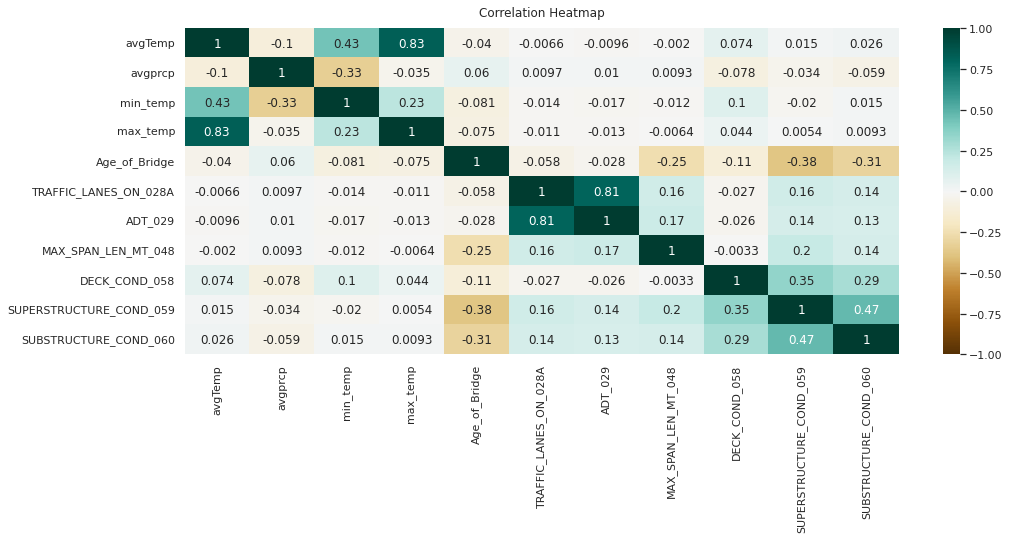

In [ ]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df6_CA.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG');
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
np.triu(np.ones_like(df6_CA.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

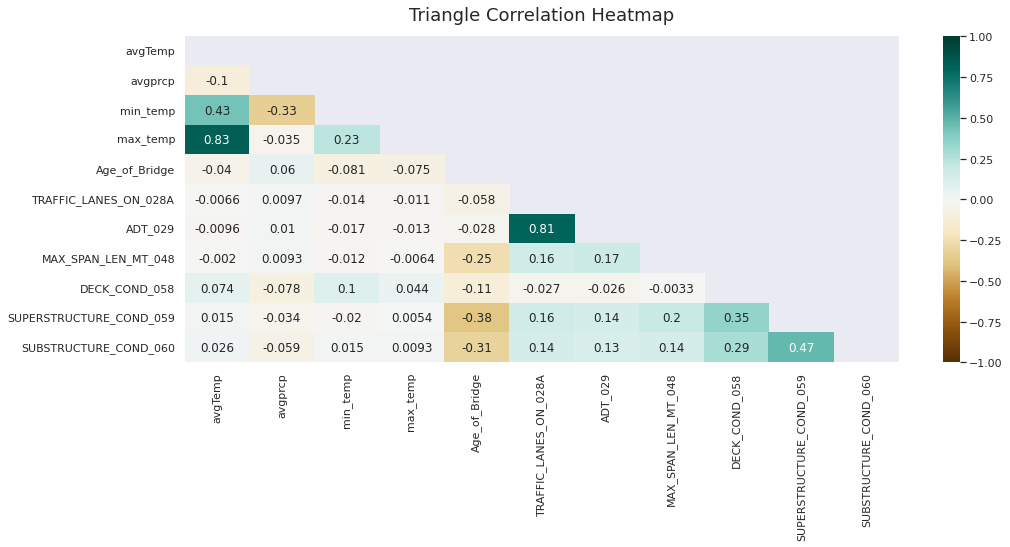

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df6_CA.corr(), dtype=np.bool))
heatmap = sns.heatmap(df6_CA.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

Gradient Boosting Trees for Deck

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5092086380099774

In [ ]:
pred = clf.predict(X_test)
pred

array([7., 7., 7., ..., 7., 7., 7.])

In [ ]:
import pickle
filename = 'GBT_Deck.sav'
pickle.dump(clf, open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open(filename,'rb'))
result1 = loaded_model.score(X_test,y_test)
print(result1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.5102697835615507


In [ ]:
loaded_model.predict(X_test)[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


7.0

In [ ]:
KA = []
for i in range(10,150,10):  # symbolizes years
  pred_i = clf.predict(np.array([i,32,40,85,25,1,500,40]).reshape(1,-1))[0]
  KA.append(pred_i)
  print(i,pred_i)

10 7.0
20 7.0
30 7.0
40 7.0
50 7.0
60 8.0
70 8.0
80 8.0
90 8.0
100 8.0
110 8.0
120 8.0
130 8.0
140 8.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassi

In [ ]:
KA

[7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X1_train, X1_test, y1_train, y1_test = train_test_split(X.values, y2.values, test_size = 0.2, random_state=42)

Gradient Boosting Trees for SuperStructure

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf_Super = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X1_train, y1_train)
clf_Super.score(X1_test, y1_test)

0.5608117291291496

In [ ]:
import pickle
filename1 = 'GBT_Super_CA.sav'
pickle.dump(clf_Super, open(filename1,'wb'))

In [ ]:
loaded_model1 = pickle.load(open(filename1,'rb'))
result2 = loaded_model.score(X1_test,y1_test)
print(result2)

In [ ]:
KA1 = []
for i in range(10,150,10):
  pred_i2 = clf_Super.predict(np.array([i,32,40,85,25,1,500,40]).reshape(1,-1))[0]
  KA1.append(pred_i)
  print(i, KA1)

10 [8.0]
20 [8.0, 8.0]
30 [8.0, 8.0, 8.0]
40 [8.0, 8.0, 8.0, 8.0]
50 [8.0, 8.0, 8.0, 8.0, 8.0]
60 [8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
70 [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
80 [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
90 [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
100 [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
110 [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
120 [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
130 [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
140 [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]


In [ ]:
KA1

[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]

In [ ]:
pred = clf.predict(X_test)
pred

array([7., 7., 7., ..., 7., 7., 7.])

Gradient Boosting Trees for SubStrucute

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X2_train, X2_test, y2_train, y2_test = train_test_split(X.values, y3.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X2_train, y2_train)
clf2.score(X2_test, y2_test)

0.6947351432163366

In [ ]:
import pickle
filename2 = 'GBT_Sub_CA.sav'
pickle.dump(clf2, open(filename2,'wb'))

In [ ]:
loaded_model2 = pickle.load(open(filename2,'rb'))
result3 = loaded_model.score(X2_test,y2_test)
print(result3)


]



**Visualization of Deck and Superstructure Materials for 2020**


In [ ]:
#Visualizing current deck structure parameters
#Deck structure type is 106,wearing surface is 107,membrane type is 108,deck protection is 109
Vis=pd.read_csv("Datafor555/CA/CA20.csv")
Vis.iloc[:,106]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (75,102) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0        1
1        8
2        2
3        1
4        2
        ..
25758    N
25759    N
25760    1
25761    N
25762    N
Name: DECK_STRUCTURE_TYPE_107, Length: 25763, dtype: object

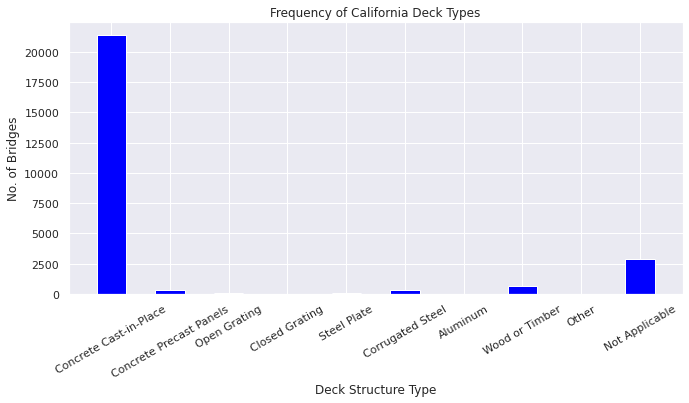

In [ ]:
#Vis['DECK_STRUCTURE_TYPE_107'].value_counts()
# 1 Concrete Cast-in-Place 2 Concrete Precast Panels 3 Open Grating 4 Closed Grating 5 Steel plate 6 Corrugated Steel 7 Aluminum 8 Wood or Timber 9 Other N Not applicable
data_dict = {'Concrete Cast-in-Place':21361, 'Concrete Precast Panels':296, 'Open Grating':60, 'Closed Grating':24,'Steel Plate':81,'Corrugated Steel':322,'Aluminum':2,'Wood or Timber':677,'Other':40,'Not Applicable':2900}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (11, 5))
plt.bar(types, values, color ='blue',
        width = 0.5)
plt.xlabel("Deck Structure Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of California Deck Types")
plt.show()

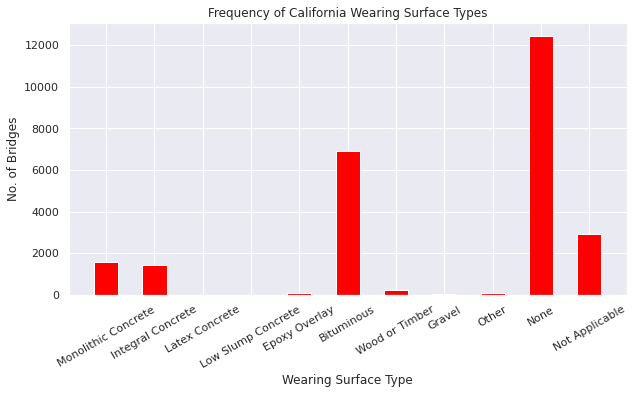

In [ ]:
#Vis['SURFACE_TYPE_108A'].value_counts()
#1 Monolithic Concrete 2 Integral Concrete 3 Latex Concrete 4 Low Slump Concrete 5 Epoxy Overlay 6 Bituminous 7 Wood or Timber 8 Gravel 9 Other 0 None (no additional concrete thickness or N Not Applicable (applies only to structures
data_dict = {'Monolithic Concrete':1599, 'Integral Concrete':1443, 'Latex Concrete':4, 'Low Slump Concrete':0,'Epoxy Overlay':72,'Bituminous':6935,'Wood or Timber':215,'Gravel':26,'Other':110, 'None':12439,'Not Applicable':2920}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='red',
        width = 0.5)
plt.xlabel("Wearing Surface Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of California Wearing Surface Types")
plt.show()

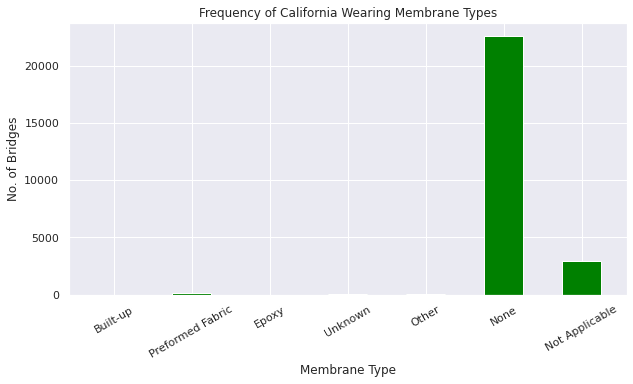

In [ ]:
Vis['MEMBRANE_TYPE_108B'].value_counts()
# 1 Built-up 2 Preformed Fabric 3 Epoxy 8 Unknown 9 Other 0 None N Not Applicable 
data_dict = {'Built-up':15, 'Preformed Fabric':129, 'Epoxy':9, 'Unknown':44,'Other':44,'None':22598,'Not Applicable':2961}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='green',
        width = 0.5)
plt.xlabel("Membrane Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of California Wearing Membrane Types")
plt.show()

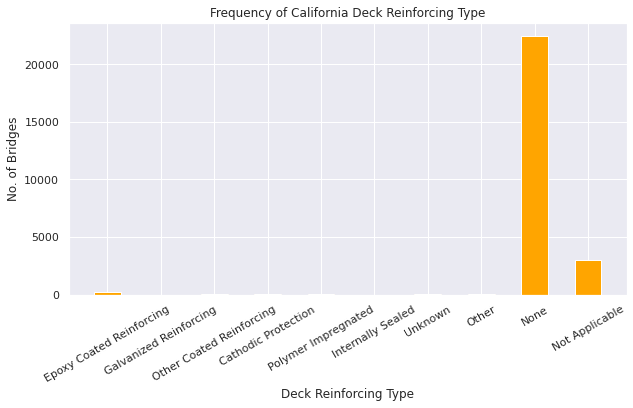

In [ ]:
Vis['DECK_PROTECTION_108C'].value_counts()
#1 Epoxy Coated Reinforcing 2 Galvanized Reinforcing 3 Other Coated Reinforcing 4 Cathodic Protection 6 Polymer Impregnated 7 Internally Sealed8 Unknown 9 Other 0 None N Not Applicable
data_dict = {'Epoxy Coated Reinforcing':249, 'Galvanized Reinforcing':1, 'Other Coated Reinforcing':2, 'Cathodic Protection':5,'Polymer Impregnated':18,'Internally Sealed':1,'Unknown':58,'Other':9,'None':22462,'Not Applicable':2955}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='orange',
        width = 0.5)
plt.xlabel("Deck Reinforcing Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of California Deck Reinforcing Type")
plt.show()

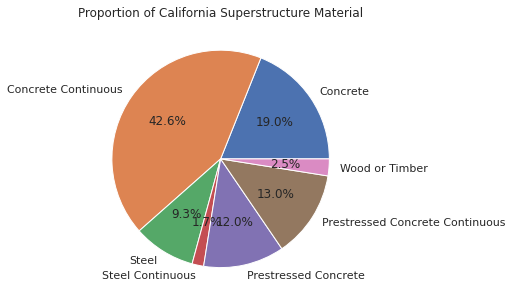

In [ ]:
#Superstructure material Material is 47, structure type is 48
import matplotlib.pyplot as plt
Vis['STRUCTURE_KIND_043A'].value_counts()
#1 Concrete 2 Concrete continuous 3 Steel 4 Steel continuous 5 Prestressed concrete * 6 Prestressed concrete continuous * 7 Wood or Timber 8 Masonry 9 Aluminum, Wrought Iron, or Cast Iron 0 Other
data_dict={'Concrete':4872,'Concrete Continuous':10935,'Steel':2378,'Steel Continuous':443,'Prestressed Concrete':3090,'Prestressed Concrete Continuous':3332,'Wood or Timber':644}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.pie(values, labels=types,autopct='%1.1f%%')
plt.title("Proportion of California Superstructure Material")
plt.show()